<a href="https://colab.research.google.com/github/ismailkaya83/MY-DEEP-LEARNING-NOTEBOOKS/blob/master/First_steps_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras and TensorFlow

First, low-level tensor manipulation — the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:

- ***Tensors***, including special tensors that store the network’s state (variables)
- ***Tensor operations*** such as addition, relu, matmul
- ***Backpropagation***, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object)

Second, high-level deep learning concepts. This translates to Keras APIs:

- ***Layers***, which are combined into a model
- ***A loss function***, which defines the feedback signal used for learning
- ***An optimizer***, which determines how learning proceeds
- ***Metrics*** to evaluate model performance, such as accuracy
- ***A training loop*** that performs mini-batch stochastic gradient descent

## Constant tensors and Variables

To do anything in TensorFlow, we’re going to need some tensors. Tensors need to be created with some initial value, so common ways to create tensors are:

Listing 3.1. All-ones or all-zeros tensors

In [1]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Listing 3.2. Random tensors

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.3704903 ]
 [-0.37368724]
 [ 3.108444  ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.32268882]
 [0.0860064 ]
 [0.501351  ]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant. For instance, in NumPy, you can do:

Listing 3.3. NumPy arrays are assignable

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

Try to do the same thing in TensorFlow: you will get an error, "EagerTensor object does not support item assignment".

Listing 3.4. TensorFlow tensors are not assignable

In [6]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it, then? That’s where variables come in. tf.Variable is the class meant to manage modifiable state in TensorFlow. 

To create a variable, you need to provide some initial value, such as a random tensor:

Listing 3.5. Creating a Variable

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.6207771 ],
       [-0.21466894],
       [ 0.431113  ]], dtype=float32)>


Listing 3.6. Assigning a value to a Variable


In [8]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Listing 3.7. Assigning a value to a subset of a Variable

In [9]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Listing 3.8. Using assign_add

In [10]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

##  Tensor operations: doing math in TensorFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations to express mathematical formulas. Here are a few examples:



In [11]:
a = tf.random.normal(shape=(3, 1), mean=1., stddev=1.)
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)

tf.Tensor(
[[3.077791 ]
 [3.232766 ]
 [2.2310061]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[ 9.472797 ]
 [10.450775 ]
 [ 4.9773884]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[1.7543634]
 [1.7979894]
 [1.4936553]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[11.22716  ]
 [12.248764 ]
 [ 6.4710436]], shape=(3, 1), dtype=float32)


Importantly, each operation we just wrote gets executed on the fly: at any point, you can print what the current result is, just like in NumPy. We call this eager execution.



## A second look at the GradientTape API

So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs. Just open a GradientTape scope, apply some computation to one or several input tensors, and retrieve the gradient of the result with respect to the inputs.

In [12]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(input_var)
print(result)
print(gradient)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


This is most commonly used to retrieve the gradients of the weights of a model with respect to its loss: gradients = tape.gradient(loss, weights).

In chapter 2, you’ve seen how the GradientTape works on either a single input or a list of inputs, and how inputs could be either scalars or high-dimensional tensors.

So far, you’ve only seen the case where the input tensors in tape.gradient() were TensorFlow variables. It’s actually possible for these inputs to be any arbitrary tensor. However, only trainable variables are being tracked by default. With a constant tensor, you’d have to manually mark it as being tracked, by calling tape.watch() on it:

In [13]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(input_const)
print(result)
print(gradient)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


Why? Because it would be too expensive to preemptively store the information required to compute the gradient of anything with respect to anything. To avoid wasting resources, the tape needs to know what to watch. Trainable variables are watched by default because computing the gradient of a loss with regard to a list of trainable variables is the most common use case of the gradient tape.

The gradient tape is a powerful utility, even capable of computing second-order gradients, that is to say, the gradient of a gradient. For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.

If you measure the position of a falling apple along a vertical axis over time, and find that it verifies position(time) = 4.9 * time ** 2, what is its acceleration? Let’s use two nested gradient tapes to find out.

In [14]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position =  4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(time)
print(speed)
print(acceleration)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## An end-to-end example: a linear classifier in pure TensorFlow

You know about tensors, variables, tensor operations, and you know how to compute gradients. That’s enough to build any machine learning model based on gradient descent. And you’re only at chapter 3!

In a machine learning job interview, you may be asked to implement a linear classifier from scratch in TensorFlow: a very simple task that serves as a filter between candidates who have some minimal machine learning background, and those who don’t. Let’s get you past that filter, and use your newfound knowledge of TensorFlow to implement such a linear classifier.

First, let’s come up with some nicely linearly-separable synthetic data to work with: two classes of points in a 2D plane.

In [15]:
"Generating two classes of random points in a 2D plane"

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

negative_samples and positive_samples are both arrays with shape (1000, 2). Let’s stack them into a single array with shape (2000, 2):

In [16]:
" Stacking the two classes into an array with shape (2000, 2)"

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
inputs

array([[-0.4084368 ,  0.7923247 ],
       [-0.24515966,  3.7064223 ],
       [-1.1331381 ,  2.8175464 ],
       ...,
       [ 2.6625898 , -0.45281217],
       [ 2.389791  , -0.70190746],
       [ 2.95066   ,  1.3787836 ]], dtype=float32)

Let’s generate the corresponding target labels, an array of zeros and ones of shape (2000, 1), where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely):

In [18]:
"Generating the corresponding targets (0 and 1)"

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

In [19]:
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

Let’s plot our data with Matplotlib, a well-known Python data visualization library (it comes preinstalled in Colab, so no need for you to install it yourself):

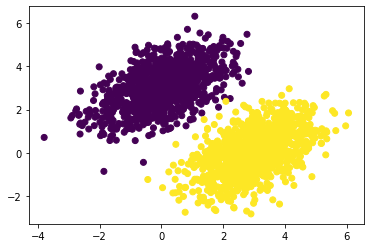

In [20]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Now, let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.

As you’ll see, it’s actually a much simpler example than the end-to-end example of a toy two-layer neural network from the end of chapter 2. However, this time, you should be able to understand everything about the code, line by line.

Let’s create our variables W and b, initialized with random values and with zeros respectively:

In [21]:
"Creating the linear classifier variables"

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [22]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.24876785],
       [0.10432887]], dtype=float32)>

In [23]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [24]:
"The forward pass function"

def model(inputs):
    return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for given input point [x, y], its prediction value is: prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.

Here’s our loss function:

In [25]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

Now, the training step, which receives some training data and updates the weights W and b so as to minimize the loss on the data:

In [26]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

For simplicity, we’ll do batch training instead of mini-batch training: we’ll run each training step (gradient computation and weight update) on the entire data, rather than iterate over the data in small batches. On one hand, this means that each training step will take much longer to run, since we compute the forward pass and the gradients for 2,000 samples at once. One the other hand, each gradient update will be much more effective at reducing the loss on the training data, since it will encompass information from all training samples instead of, say, only 128 random samples. As a result, we will need much fewer steps of training, and we should use a larger learning rate than what we would typically use for mini-batch training (we’ll use learning_rate = 0.1, defined above).

In [27]:
for step in range(40):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.1884
Loss at step 1: 0.0949
Loss at step 2: 0.0848
Loss at step 3: 0.0789
Loss at step 4: 0.0740
Loss at step 5: 0.0697
Loss at step 6: 0.0657
Loss at step 7: 0.0621
Loss at step 8: 0.0588
Loss at step 9: 0.0558
Loss at step 10: 0.0530
Loss at step 11: 0.0505
Loss at step 12: 0.0482
Loss at step 13: 0.0461
Loss at step 14: 0.0442
Loss at step 15: 0.0425
Loss at step 16: 0.0409
Loss at step 17: 0.0395
Loss at step 18: 0.0381
Loss at step 19: 0.0369
Loss at step 20: 0.0358
Loss at step 21: 0.0348
Loss at step 22: 0.0339
Loss at step 23: 0.0331
Loss at step 24: 0.0323
Loss at step 25: 0.0316
Loss at step 26: 0.0310
Loss at step 27: 0.0304
Loss at step 28: 0.0299
Loss at step 29: 0.0294
Loss at step 30: 0.0289
Loss at step 31: 0.0285
Loss at step 32: 0.0282
Loss at step 33: 0.0278
Loss at step 34: 0.0275
Loss at step 35: 0.0273
Loss at step 36: 0.0270
Loss at step 37: 0.0268
Loss at step 38: 0.0266
Loss at step 39: 0.0264


After 30 steps, the training loss seems to have stabilized around 0.025. Let’s plot how our linear model classifies the training data points. Because our targets are zeros and ones, a given input point will be classified as "0" if its prediction value is below 0.5, and as "1" if it is above 0.5:

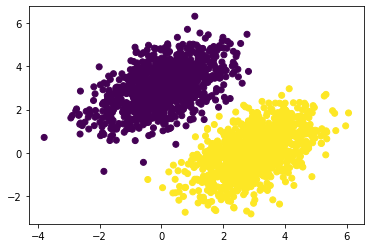

In [28]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Recall that the prediction value for a given point [x, y] is simply prediction == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b. Thus, class "0" is defined as: w1 * x + w2 * y + b < 0.5 and class "1" is defined as: w1 * x + w2 * y + b > 0.5. You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line, class 1, below the line, class 0. You may be used to seeing line equations in the format y = a * x + b; in the same format, our line becomes: y = - w1 / w2 * x + (0.5 - b) / w2.

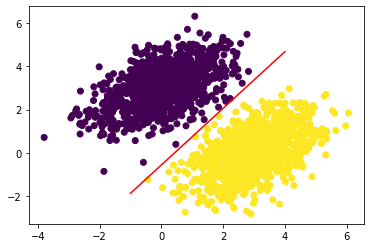

In [29]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

# Anatomy of a neural network: understanding core Keras APIs

At this point, you know the basics of TensorFlow, and you can use it to implement a toy model from scratch, such as the batch linear classifier above, or the toy neural network from the end chapter 2. That’s a solid foundation to build upon. It’s now time to move on to a more productive, more robust path to deep learning: the Keras API.

##  Layers: the building blocks of deep learning

Different types of layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). Sequence data, stored in 3D tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an LSTM layer, or 1D convolution layers (Conv1D). Image data, stored in 4D tensors, is usually processed by 2D convolution layers (Conv2D).

In [30]:
"The base Layer class in Keras"

from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Once instantiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [31]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


When using Keras, you don’t have to worry about size compatibility most of the time, because the layers you add to your models are dynamically built to match the shape of the incoming layer. For instance, suppose you write the following:

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(32)
])

In [33]:
model = keras.Sequential([
  SimpleDense(32, activation='relu'),
  SimpleDense(64, activation='relu'),
  SimpleDense(32, activation='relu'),
  SimpleDense(10, activation='softmax')
])

Once the model architecture is defined, you still have to choose three more things:

- Loss function (objective function)  — The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- Optimizer  — Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).
- Metrics — The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

In the above call to compile(), we passed the optimizer, loss, and metrics as strings (such as 'rmsprop'). These strings are actually shortcuts that get converted to Python objects. For instance, 'rmsprop' becomes keras.optimizers.RMSprop(). Importantly, it’s also possible to specify these arguments as object instances, like this:



In [35]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

This is useful if you want to pass your own custom losses or metrics, or if you want to further configure the objects you’re using — for instance, by passing a learning_rate argument to the optimizer:



In [36]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])

NameError: ignored

Optimizers:

- SGD() (with or without momentum)
- RMSprop()
- Adam()
- Adagrad()
Etc.

Losses:

- CategoricalCrossentropy()
- SparseCategoricalCrossentropy()
- BinaryCrossentropy()
- MeanSquaredError()
- KLDivergence()
- CosineSimilarity()
Etc.

Metrics:

- CategoricalAccuracy()
- SparseCategoricalAccuracy()
- BinaryAccuracy()
- AUC()
- Precision()
- Recall()
Etc.

***Picking a loss function***

Choosing the right loss function for the right problem is extremely important: your network will take any shortcut it can to minimize the loss; so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted. Imagine a stupid, omnipotent AI trained via SGD, with this poorly chosen objective function: “maximizing the average well-being of all humans alive.” To make its job easier, this AI might choose to kill all humans except a few and focus on the well-being of the remaining ones — because average well-being isn’t affected by how many humans are left. That might not be what you intended! Just remember that all neural networks you build will be just as ruthless in lowering their loss function — so choose the objective wisely, or you’ll have to face unintended side effects.

Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use binary crossentropy for a two-class classification problem, categorical crossentropy for a many-class classification problem, and so on. Only when you’re working on truly new research problems will you have to develop your own objective functions. In the next few chapters, we’ll detail explicitly which loss functions to choose for a wide range of common tasks.

After compile() comes fit(). The fit method implements the training loop itself. Its key arguments are:

- The data (inputs and targets) to train on. It will typically be passed either in the form of NumPy arrays, of a TensorFlow Dataset object. 
- The number of epochs to train for: how many times the training loop should iterate over the data passed.
- The batch size to use within each epoch of mini-batch gradient descent: the number of training examples considered to compute the gradients for one weight update step.

In [37]:
history = model.fit(
  inputs,
  targets,
  epochs=5,
  batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 10.8416 - binary_accuracy: 0.0155
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 10.4423 - binary_accuracy: 0.0155
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 10.1026 - binary_accuracy: 0.0160
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 9.7760 - binary_accuracy: 0.0160
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 9.4583 - binary_accuracy: 0.0160


The call to fit returns a History object. This object contains a history field which is a dict mapping keys such as "loss" or specific metric names to the list of their per-epoch values.



In [38]:
history.history

{'binary_accuracy': [0.01549999974668026,
  0.01549999974668026,
  0.01600000075995922,
  0.01600000075995922,
  0.01600000075995922],
 'loss': [10.84164047241211,
  10.442279815673828,
  10.102621078491211,
  9.776000022888184,
  9.458322525024414]}

To keep an eye on how the model does on new data, it’s standard practice to reserve a subset of the training data as “validation data”: you won’t be training the model on this data, but you will use it to compute a loss value and metrics value. You do this use the validation_data argument in fit(). Like the training data, the validation data could be passed as NumPy arrays or as a TensorFlow Dataset object.



In [39]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[-num_validation_samples:]
val_targets = shuffled_targets[-num_validation_samples:]
training_inputs = shuffled_inputs[:num_validation_samples]
training_targets = shuffled_targets[:num_validation_samples]
model.fit(
  training_inputs,
  training_targets,
  epochs=5,
  batch_size=16,
  validation_data=(val_inputs, val_targets)
)

Epoch 1/5
38/38 [==============================] - 0s 8ms/step - loss: 0.2160 - binary_accuracy: 0.9683 - val_loss: 0.0361 - val_binary_accuracy: 0.9983
Epoch 2/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0592 - binary_accuracy: 0.9717 - val_loss: 0.0359 - val_binary_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0759 - binary_accuracy: 0.9550 - val_loss: 0.0349 - val_binary_accuracy: 0.9933
Epoch 4/5
38/38 [==============================] - 0s 4ms/step - loss: 0.0739 - binary_accuracy: 0.9533 - val_loss: 0.1416 - val_binary_accuracy: 0.7700
Epoch 5/5
38/38 [==============================] - 0s 5ms/step - loss: 0.0568 - binary_accuracy: 0.9767 - val_loss: 0.2170 - val_binary_accuracy: 0.9383


The value of the loss on the validation data is called the “validation loss”, to distinguish it from the “training loss”. Note that it’s essential to keep the training data and validation data strictly separate: the purpose of validation is to monitor whether what the model is learning is actually useful on new data. If any of the validation data has been seen by the model during training, your validation loss and metrics will be flawed.

Note that if you want to compute the validation loss and metrics after training is complete, you can call the evaluate method:

loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

evaluate() will iterate in batches (of size batch_size) over the data passed, and return a list of scalars, where the first entry is the validation loss and the following entries are the validation metrics. If the model has no metrics, only the validation loss is returned (rather than a list).

Once you’ve trained your model, you’re going to want to use it to make predictions on new data. This is called "inference". To do this, a naive approach would simply be to call the model:



In [40]:
predictions = model(new_inputs)

NameError: ignored

However, this will process all inputs in new_inputs at once, which may not be feasible if you’re looking at a lot of data (in particular, it may require more memory than your GPU has).

A better way to do inference is to use the predict() method. It will iterate over the data in small batches, and return a NumPy array of predictions. And unlike call, it can also process TensorFlow Dataset objects.

In [41]:
predictions = model.predict(new_inputs, batch_size=128)

NameError: ignored

For instance, if we use predict() on some of our validation data with the linear model we trained earlier, we get scalar scores between 0 and 1 — below 0.5 indicates that the model considers the corresponding point to belong to class 0, and above 0.5 indicates that the model considers the corresponding point to belong to class 1.



In [42]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.7546128 ]
 [ 1.3779924 ]
 [-0.45214748]
 [-0.845568  ]
 [-0.2648217 ]
 [-0.55429757]
 [-0.36746436]
 [ 0.76025116]
 [-0.10686332]
 [-0.8960666 ]]
